In [4]:
from tensorflow.python.keras.models import load_model
from PIL import Image
import numpy as np

model = load_model('num_model.h5')

img = Image.open('./data/test/5.png').convert("L")
img = np.resize(img, (1,11700))
test_data = ((np.array(img)/255)-1)*-1
#img = np.expand_dims(img, axis=1)
res = model.predict_classes(test_data)

ValueError: in user code:

    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\smhrd\anaconda3\envs\deep2\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 11700]


ValueError: cannot reshape array of size 4089 into shape (1,85,160,1)

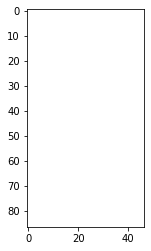

In [9]:
from tensorflow.python.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('num_model.h5')

test_num = plt.imread('./data/test/5.png')
test_num = test_num[:,:,0]
test_num = (test_num > 125) * test_num
test_num = test_num.astype('float32') / 255.

plt.imshow(test_num, cmap='Greys', interpolation='nearest');

test_num = test_num.reshape((1, 85, 160, 1))

print('The Answer is ', model.predict_classes(test_num))

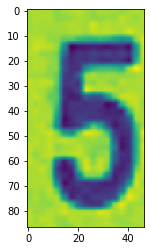

ValueError: cannot reshape array of size 11700 into shape (1,180,65,3)

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import cv2
model = load_model('num_model.h5')
img = cv2.imread('./data/test/5.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

img = img.astype(np.float32)
img = cv2.resize(img, (180,65))
test_num = img.flatten() / 255.0
#test_num = test_num.astype('float32') / 255.
test_num = test_num.reshape((1, 180,65, 3))
print("Answer : ", model.predict_classes(test_num))
plt.show()